In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('Downloads/tiktok_hashtag.csv') 
data.head(5)

created_time                                          video_url  \
0    1598956383  ['https://v16m.tiktokcdn.com/3730c9d0e2be03207...   
1    1589953513  ['https://v16m.tiktokcdn.com/d09ee9bb67ef7d68f...   
2    1591942711  ['https://v16m.tiktokcdn.com/791a40f53a5d17f83...   
3    1595571393  ['https://v16m.tiktokcdn.com/f3fe7a6dd076e013c...   
4    1589351498  ['https://v16m.tiktokcdn.com/79c795c0c6205d97e...   

                                          video_desc         user_name  \
0  Ada yang pernah makan? atau sering kyk aku? 🤣🥰...  venithyacalistaa   
1  cemilan fav akuu, aku bkinnya kmrn siang, buat...  venithyacalistaa   
2  tutorial telur gulung anti gagal check #samasa...       fahmimiasmr   
3  Bisa buat kue ultah, Puding brownies pakai @ch...    cookingwithhel   
4   ENAK PARAH😭 #indomie #masakdirumah #fypindonesia            lyoooz   

   user_follower_cnt  cnt_comments  cnt_plays  cnt_shares  cnt_likes  \
0             830900         10800   13300000       22400    1700000   
1             830900          4156   19600000       34500    1400000   
2             768400          4076   20500000       22400    1300000   
3             615200          3195   16100000       72400    1100000   
4             381900          3087    7600000        9083     815800   

   video_length                                           hashtags  \
0            65  ['#fyp', '#lebihdari', '#masakanindonesia', '#...   
1            52  ['#masakdirumah', '#samasamabelajar', '#berbag...   
2            36  ['#samasamabelajar', '#berbagiilmu', '#fahmimi...   
3            57  ['#masakdirumah', '#pudingcoklat', '#berbagisk...   
4            41     ['#indomie', '#masakdirumah', '#fypindonesia']   

      mentions  
0          NaN  
1          NaN  
2          NaN  
3  @chocolatos  
4          NaN

# Data Cleansing

In [14]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.strip_short
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [15]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
exclusions = []
exclusions.extend(stopwords)

In [113]:
generic_words = ['buat','nya','aja','sdm','gue','kalian','pake','kalau','banget','hingga','resep','pakai','video',
                 'trus','bikin','youtube','pas','mau','link','sdt','nih','mereka','enak','menit','sih','biar','jadi',
                 'tutorial','postingan','ya','ini','cek','udah','gak','cookingwithhel','cek','klik','bio','penasaran',
                 'penjelasan','sekarang','soalnya','kali','yah','sesuai','kali','suka','klo','cuma','hungryfever','jangan',
                 'bahan','klo','lebih','rata','cara','kalo','jdi','lbh','semua','aku','cobain','https','masak','rasa',
                 'baru','coba','panas','masukan','langsung','selamat','anak','sedikit','devina','hermawan','youtube',
                 'banyak','sama','paling','apa','kan','nah','check','out','with','yackikuka','hel', 'lengkapnya', 
                 'selengkapnya', 'cari','store','xanderskitchen','full','available','dlm','dalam','keadaan','sehat','fypシ',
                 'part','ada','bgt','fyp','makan','yuk','gampang','buka','masakdirumah','samasamabelajar','samasamadirumah',
                 'guys','siapa','follow','tutorialmasak','tau','menu','lupa','sendiri','balas','ala','warga','tiktok',
                 'dah','deh','ya','gini','komentarnetizen','giveaway','kasih','kaya','yaa','fypシツ','kangen','mencoba',
                 'gagal'
                ]

exclusions.extend(generic_words)

In [17]:
data['title'] = data['video_desc'].apply(lambda st: st[:st.find("\n")])
data['title'] = data['title'].str.lower()
data['title'] = data['title'].map(lambda x: clean_text(x))

In [18]:
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (exclusions)]))

In [19]:
# data['title'] = data['comment'].apply(lambda st: st[:st.find(",")])
# data['title'] = data['title'].apply(lambda st: st[:st.find(".")])
# data['title'] = data['title'].apply(lambda st: st[:st.find("\n")])

# Cleaning Hashtags and Mentions from Captions

In [20]:
import numpy as np
data['hashtags'] = data['hashtags'].astype(str)
data['clean_tag'] = data['hashtags'].apply(lambda st: st[1:st.find("]")])
data['clean_tag'] = data['clean_tag'].apply(lambda st: list(st.split(",")))
data

created_time                                          video_url  \
0       1598956383  ['https://v16m.tiktokcdn.com/3730c9d0e2be03207...   
1       1589953513  ['https://v16m.tiktokcdn.com/d09ee9bb67ef7d68f...   
2       1591942711  ['https://v16m.tiktokcdn.com/791a40f53a5d17f83...   
3       1595571393  ['https://v16m.tiktokcdn.com/f3fe7a6dd076e013c...   
4       1589351498  ['https://v16m.tiktokcdn.com/79c795c0c6205d97e...   
...            ...                                                ...   
1995    1585904346  ['https://v16m.tiktokcdn.com/085c5294d84fb8c13...   
1996    1587982857  ['https://v16m.tiktokcdn.com/450260a78263b1a66...   
1997    1588068424  ['https://v16m.tiktokcdn.com/4798ad11b679eb975...   
1998    1587195091  ['https://v16m.tiktokcdn.com/ba5093ee4175b06ca...   
1999    1586929503  ['https://v16m.tiktokcdn.com/4bf836fedddb1dfc1...   

                                             video_desc          user_name  \
0     Ada yang pernah makan? atau sering kyk aku? 🤣🥰...   venithyacalistaa   
1     cemilan fav akuu, aku bkinnya kmrn siang, buat...   venithyacalistaa   
2     tutorial telur gulung anti gagal check #samasa...        fahmimiasmr   
3     Bisa buat kue ultah, Puding brownies pakai @ch...     cookingwithhel   
4      ENAK PARAH😭 #indomie #masakdirumah #fypindonesia             lyoooz   
...                                                 ...                ...   
1995  #videomasak #tutorialmasak #dirumahaja #curros...      putripradipta   
1996  Semur Daging #semurdaging #tiktokprom #minitut...  leonydazaldrianto   
1997  PISCOK dengan bahan seadanya dirumah🤟  #tiktok...            dnd1313   
1998  #samasamadirumah #dirumahaja #videomasak #cook...     dewifortunaaaa   
1999  CHURROS MILO RECIPE #fyp #foryourpage #samasam...             brlntk   

      user_follower_cnt  cnt_comments  cnt_plays  cnt_shares  cnt_likes  \
0                830900         10800   13300000       22400    1700000   
1                830900          4156   19600000       34500    1400000   
2                768400          4076   20500000       22400    1300000   
3                615200          3195   16100000       72400    1100000   
4                381900          3087    7600000        9083     815800   
...                 ...           ...        ...         ...        ...   
1995               2187             0       4932           1         70   
1996                 73             0        427           0         69   
1997                 57             0        526           0         69   
1998               4859             1       2593           0         69   
1999                 75             0       1413           5         69   

      video_length                                           hashtags  \
0               65  ['#fyp', '#lebihdari', '#masakanindonesia', '#...   
1               52  ['#masakdirumah', '#samasamabelajar', '#berbag...   
2               36  ['#samasamabelajar', '#berbagiilmu', '#fahmimi...   
3               57  ['#masakdirumah', '#pudingcoklat', '#berbagisk...   
4               41     ['#indomie', '#masakdirumah', '#fypindonesia']   
...            ...                                                ...   
1995            20  ['#videomasak', '#tutorialmasak', '#dirumahaja...   
1996            15  ['#semurdaging', '#tiktokprom', '#minitutorial...   
1997            14  ['#tiktokfood', '#tutorialmasak', '#videomasak...   
1998            47  ['#samasamadirumah', '#dirumahaja', '#videomas...   
1999            13  ['#fyp', '#foryourpage', '#samasamadirumah', '...   

         mentions                                              title  \
0             NaN  pernah makan sering kyk 🤣🥰🤟🏻 fyp lebihdarimeni...   
1             NaN  cemilan fav akuu bkinnya kmrn siang inspirasi ...   
2             NaN  telur gulung anti gagal samasamabelajar berbag...   
3     @chocolatos  kue ultah puding brownies chocolatos lembut ny...   
4             NaN            parah😭 indomie masakdirum

In [21]:
df_tag = pd.DataFrame()

df_tag['video_url'] = data['video_url']
df_tag['hashtags'] = data['hashtags'].str.replace('[','').str.replace(']','').str.replace("'","")

from itertools import chain

genres = df_tag['hashtags'].str.split(', ')
df_tag = pd.DataFrame({
    'video_url' : df_tag['video_url'].values.repeat(genres.str.len()),
    'tags' : list(chain.from_iterable(genres.tolist()))
})

hashtag_list = df_tag['tags'].tolist()

In [22]:
exclusions.extend(hashtag_list)

In [49]:
hashtag_list_unique = []

for x in hashtag_list:
    if x not in hashtag_list_unique:
        hashtag_list_unique.append(x)
        
exclusions.extend(hashtag_list_unique)

In [51]:
df_mention = pd.DataFrame()

df_mention['video_url'] = data['video_url']
df_mention['mentions'] = data['mentions'].str.replace('[','').str.replace(']','').str.replace("'","")
df_mention

mention_list = df_mention['mentions'].tolist()
mention_list_unique = []

for x in mention_list:
    if x not in mention_list_unique:
        mention_list_unique.append(x)
        
exclusions.extend(mention_list_unique)

In [56]:
# # Convert Likes to Integer
# data['likes'] = data['likes_views'].str.replace(',','').astype(int)

# Extract simplified title
import pandas as pd
import re

result_list = []

data['title'] = data['video_desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (hashtag_list_unique)]))
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (mention_list_unique)]))

for value in data.title.values:
    non_data = re.split('Data|data', value) # split text removing "data"
    terms_list = [term for term in non_data if len(term) > 0] # skip empty terms
    substrs = [term.split()[0:6] for term in terms_list]  # slice and grab first six terms
    result = [' '.join(term) for term in substrs] # combine the terms back into substrings
    result_list.append(result)

data['title_simp'] = result_list
data['title_simp'] = data['title_simp'].astype(str).str.replace('[','').str.replace(']','').str.replace('"','').str.replace("'","")
data

created_time                                          video_url  \
0       1598956383  ['https://v16m.tiktokcdn.com/3730c9d0e2be03207...   
1       1589953513  ['https://v16m.tiktokcdn.com/d09ee9bb67ef7d68f...   
2       1591942711  ['https://v16m.tiktokcdn.com/791a40f53a5d17f83...   
3       1595571393  ['https://v16m.tiktokcdn.com/f3fe7a6dd076e013c...   
4       1589351498  ['https://v16m.tiktokcdn.com/79c795c0c6205d97e...   
...            ...                                                ...   
1995    1585904346  ['https://v16m.tiktokcdn.com/085c5294d84fb8c13...   
1996    1587982857  ['https://v16m.tiktokcdn.com/450260a78263b1a66...   
1997    1588068424  ['https://v16m.tiktokcdn.com/4798ad11b679eb975...   
1998    1587195091  ['https://v16m.tiktokcdn.com/ba5093ee4175b06ca...   
1999    1586929503  ['https://v16m.tiktokcdn.com/4bf836fedddb1dfc1...   

                                             video_desc          user_name  \
0     Ada yang pernah makan? atau sering kyk aku? 🤣🥰...   venithyacalistaa   
1     cemilan fav akuu, aku bkinnya kmrn siang, buat...   venithyacalistaa   
2     tutorial telur gulung anti gagal check #samasa...        fahmimiasmr   
3     Bisa buat kue ultah, Puding brownies pakai @ch...     cookingwithhel   
4      ENAK PARAH😭 #indomie #masakdirumah #fypindonesia             lyoooz   
...                                                 ...                ...   
1995  #videomasak #tutorialmasak #dirumahaja #curros...      putripradipta   
1996  Semur Daging #semurdaging #tiktokprom #minitut...  leonydazaldrianto   
1997  PISCOK dengan bahan seadanya dirumah🤟  #tiktok...            dnd1313   
1998  #samasamadirumah #dirumahaja #videomasak #cook...     dewifortunaaaa   
1999  CHURROS MILO RECIPE #fyp #foryourpage #samasam...             brlntk   

      user_follower_cnt  cnt_comments  cnt_plays  cnt_shares  cnt_likes  \
0                830900         10800   13300000       22400    1700000   
1                830900          4156   19600000       34500    1400000   
2                768400          4076   20500000       22400    1300000   
3                615200          3195   16100000       72400    1100000   
4                381900          3087    7600000        9083     815800   
...                 ...           ...        ...         ...        ...   
1995               2187             0       4932           1         70   
1996                 73             0        427           0         69   
1997                 57             0        526           0         69   
1998               4859             1       2593           0         69   
1999                 75             0       1413           5         69   

      video_length                                           hashtags  \
0               65  ['#fyp', '#lebihdari', '#masakanindonesia', '#...   
1               52  ['#masakdirumah', '#samasamabelajar', '#berbag...   
2               36  ['#samasamabelajar', '#berbagiilmu', '#fahmimi...   
3               57  ['#masakdirumah', '#pudingcoklat', '#berbagisk...   
4               41     ['#indomie', '#masakdirumah', '#fypindonesia']   
...            ...                                                ...   
1995            20  ['#videomasak', '#tutorialmasak', '#dirumahaja...   
1996            15  ['#semurdaging', '#tiktokprom', '#minitutorial...   
1997            14  ['#tiktokfood', '#tutorialmasak', '#videomasak...   
1998            47  ['#samasamadirumah', '#dirumahaja', '#videomas...   
1999            13  ['#fyp', '#foryourpage', '#samasamadirumah', '...   

         mentions                                              title  \
0             NaN  Ada yang pernah makan? atau sering kyk aku? 🤣🥰...   
1             NaN  cemilan fav akuu, aku bkinnya kmrn siang, buat...   
2             NaN             tutorial telur gulung anti gagal check   
3     @chocolatos  Bisa buat kue ultah, Puding brownies pakai @ch...   
4             NaN                                     

# Top Likes and Views

In [29]:
data_topuser = data.groupby(['user_name']).video_url.count().reset_index().sort_values("video_url", ascending=False).head(15)
data_topuser

user_name  video_url
897  venithyacalistaa         97
5         2beha10ribu         75
188        cellahalim         35
555     masakansimple         35
58          alvina_tw         33
314       fahmimiasmr         33
797      shitabhoraa_         28
851      tentangperut         27
193       cheekykiddo         27
414       hungryfever         26
402         henjiwong         20
216    cookingwithhel         20
520          lemaknyo         20
329          felya_ng         18
699     queerkunoichi         17

In [30]:
data_toppost = data.loc[data['user_name'].isin(data_topuser["user_name"])]
data_toppost

created_time                                          video_url  \
0       1598956383  ['https://v16m.tiktokcdn.com/3730c9d0e2be03207...   
1       1589953513  ['https://v16m.tiktokcdn.com/d09ee9bb67ef7d68f...   
2       1591942711  ['https://v16m.tiktokcdn.com/791a40f53a5d17f83...   
3       1595571393  ['https://v16m.tiktokcdn.com/f3fe7a6dd076e013c...   
5       1591345145  ['https://v16m.tiktokcdn.com/5b1c74713b2497361...   
...            ...                                                ...   
1706    1589719423  ['https://v16m.tiktokcdn.com/2ba9232cb67300a25...   
1716    1589182179  ['https://v16m.tiktokcdn.com/81e19b62615a20cec...   
1801    1590575337  ['https://v16m.tiktokcdn.com/6a8beb8cc03b294fd...   
1804    1590462737  ['https://v16m.tiktokcdn.com/df98fe604c87920ad...   
1945    1589344889  ['https://v16m.tiktokcdn.com/348e237b92afecc5e...   

                                             video_desc         user_name  \
0     Ada yang pernah makan? atau sering kyk aku? 🤣🥰...  venithyacalistaa   
1     cemilan fav akuu, aku bkinnya kmrn siang, buat...  venithyacalistaa   
2     tutorial telur gulung anti gagal check #samasa...       fahmimiasmr   
3     Bisa buat kue ultah, Puding brownies pakai @ch...    cookingwithhel   
5     resep telur dadar katsu telur yang ditelurin c...       fahmimiasmr   
...                                                 ...               ...   
1706  sebetulnya cukup makan nasi panas+sambel ini a...        cellahalim   
1716  do something fun and enjoy 👍❤️ #masakdirumah #...        cellahalim   
1801  Resep Rendang #resepcella #percobaancella #tut...        cellahalim   
1804  my job part 1 #percobaancella #resepcella #swe...        cellahalim   
1945  edisi sm mama 🙆‍♀️🙆‍♀️🙆‍♀️ #masakdirumah #Seje...        cellahalim   

      user_follower_cnt  cnt_comments  cnt_plays  cnt_shares  cnt_likes  \
0                830900         10800   13300000       22400    1700000   
1                830900          4156   19600000       34500    1400000   
2                768400          4076   20500000       22400    1300000   
3                615200          3195   16100000       72400    1100000   
5                768400          2853    7500000       12800     681700   
...                 ...           ...        ...         ...        ...   
1706              66500             0       2576           0        124   
1716              66500             1       3349           0        122   
1801              66500             0       5601           8         99   
1804              66500            14       3448           0         98   
1945              66500             0       2570           1         74   

      video_length                                           hashtags  \
0               65  ['#fyp', '#lebihdari', '#masakanindonesia', '#...   
1               52  ['#masakdirumah', '#samasamabelajar', '#berbag...   
2               36  ['#samasamabelajar', '#berbagiilmu', '#fahmimi...   
3               57  ['#masakdirumah', '#pudingcoklat', '#berbagisk...   
5               41  ['#samasamabelajar', '#berbagiilmu', '#fahmimi...   
...            ...                                                ...   
1706            15  ['#masakdirumah', '#tutorialmasak', '#fyp', '#...   
1716            15  ['#masakdirumah', '#samasamadirumah', '#tutori...   
1801            12  ['#resepcella', '#percobaancella', '#tutorialm...   
1804            15  ['#percobaancella', '#resepcella', '#sweet', '...   
1945            14  ['#masakdirumah', '#SejernihDepanMata', '#kome...   

         mentions                                              title  \
0             NaN  pernah makan sering kyk 🤣🥰🤟🏻 fyp lebihdarimeni...   
1             NaN  cemilan fav akuu bkinnya kmrn siang inspirasi ...   
2             NaN  telur gulung anti gagal samasamabelajar berbag...   
3     @chocolatos  kue ultah puding brownies chocolatos lembut ny...   
5             NaN  telur dadar katsu telur ditelurin samasamabela.

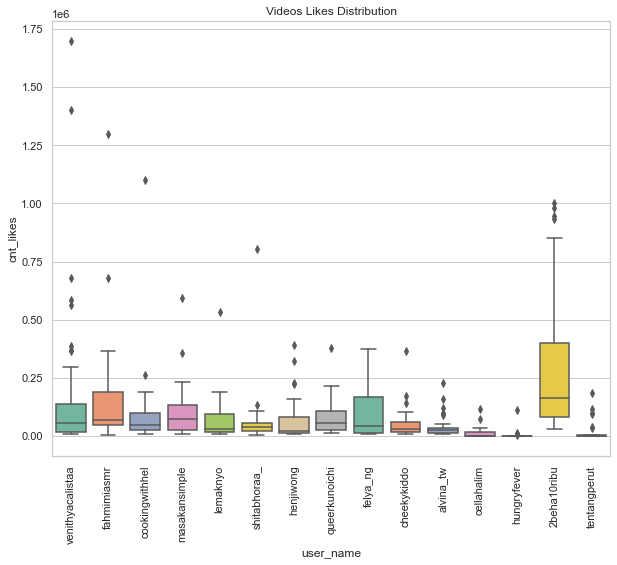

In [568]:
f, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x="user_name", y="cnt_likes", data=data_toppost, palette="Set2")
ax.set_title('Videos Likes Distribution')
for item in ax.get_xticklabels():
        item.set_rotation(90)

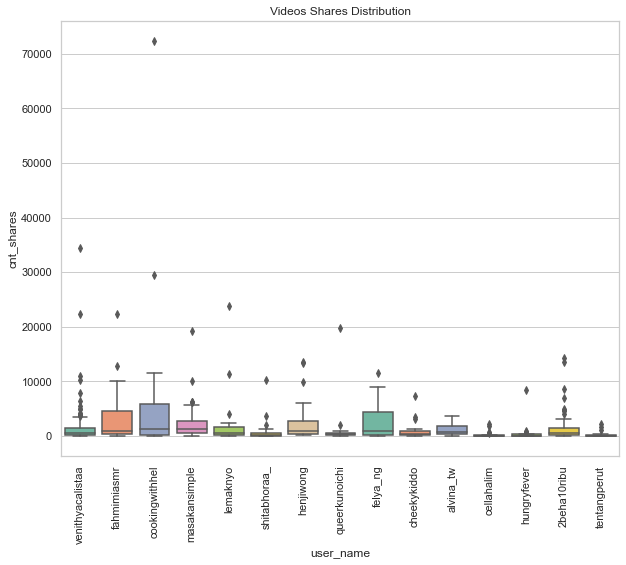

In [567]:
f, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x="user_name", y="cnt_shares", data=data_toppost, palette="Set2")
ax.set_title('Videos Shares Distribution')
for item in ax.get_xticklabels():
        item.set_rotation(90)

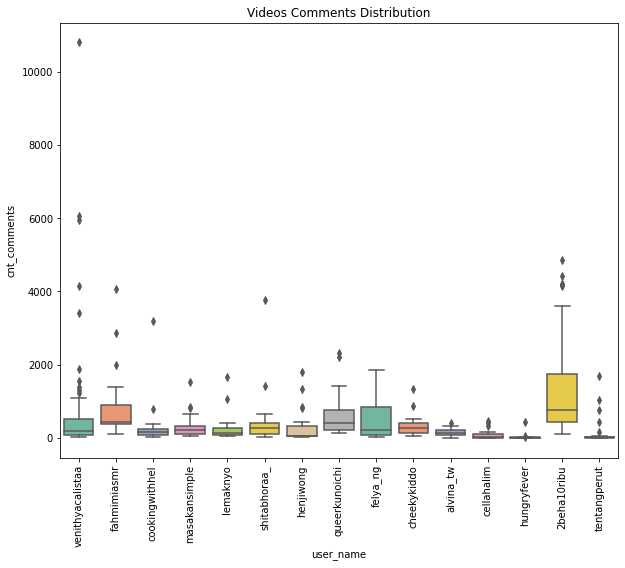

In [39]:
f, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x="user_name", y="cnt_comments", data=data_toppost, palette="Set2")
ax.set_title('Videos Comments Distribution')
for item in ax.get_xticklabels():
        item.set_rotation(90)

# Timeseries Trends

In [79]:
import datetime as dt

timeseries = pd.DataFrame()
timeseries = data[['created_time','video_url','user_name','title_simp','cnt_likes','video_length']]

timeseries['post_time'] = pd.to_datetime(timeseries['created_time'], unit='s')
timeseries['post_time_wib'] = timeseries['post_time']+ pd.Timedelta(hours=7)
timeseries['post_hour'] = timeseries['post_time_wib'].dt.hour
timeseries['post_day_name'] = timeseries['post_time_wib'].dt.day_name()
timeseries['post_date'] = timeseries['post_time_wib'].dt.normalize()
timeseries['week_start_date'] = timeseries['post_date'] - pd.to_timedelta(timeseries['post_date'].dt.dayofweek, unit='d')
timeseries

/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

created_time                                          video_url  \
0       1598956383  ['https://v16m.tiktokcdn.com/3730c9d0e2be03207...   
1       1589953513  ['https://v16m.tiktokcdn.com/d09ee9bb67ef7d68f...   
2       1591942711  ['https://v16m.tiktokcdn.com/791a40f53a5d17f83...   
3       1595571393  ['https://v16m.tiktokcdn.com/f3fe7a6dd076e013c...   
4       1589351498  ['https://v16m.tiktokcdn.com/79c795c0c6205d97e...   
...            ...                                                ...   
1995    1585904346  ['https://v16m.tiktokcdn.com/085c5294d84fb8c13...   
1996    1587982857  ['https://v16m.tiktokcdn.com/450260a78263b1a66...   
1997    1588068424  ['https://v16m.tiktokcdn.com/4798ad11b679eb975...   
1998    1587195091  ['https://v16m.tiktokcdn.com/ba5093ee4175b06ca...   
1999    1586929503  ['https://v16m.tiktokcdn.com/4bf836fedddb1dfc1...   

              user_name                              title_simp  cnt_likes  \
0      venithyacalistaa      Ada yang pernah makan? atau sering    1700000   
1      venithyacalistaa      cemilan fav akuu, aku bkinnya kmrn    1400000   
2           fahmimiasmr  tutorial telur gulung anti gagal check    1300000   
3        cookingwithhel    Bisa buat kue ultah, Puding brownies    1100000   
4                lyoooz                             ENAK PARAH😭     815800   
...                 ...                                     ...        ...   
1995      putripradipta                                                 70   
1996  leonydazaldrianto               Semur Daging #viral_video         69   
1997            dnd1313   PISCOK dengan bahan seadanya dirumah🤟         69   
1998     dewifortunaaaa                                                 69   
1999             brlntk                     CHURROS MILO RECIPE         69   

      video_length           post_time       post_time_wib  post_hour  \
0               65 2020-09-01 10:33:03 2020-09-01 17:33:03         17   
1               52 2020-05-20 05:45:13 2020-05-20 12:45:13         12   
2               36 2020-06-12 06:18:31 2020-06-12 13:18:31         13   
3               57 2020-07-24 06:16:33 2020-07-24 13:16:33         13   
4               41 2020-05-13 06:31:38 2020-05-13 13:31:38         13   
...            ...                 ...                 ...        ...   
1995            20 2020-04-03 08:59:06 2020-04-03 15:59:06         15   
1996            15 2020-04-27 10:20:57 2020-04-27 17:20:57         17   
1997            14 2020-04-28 10:07:04 2020-04-28 17:07:04         17   
1998            47 2020-04-18 07:31:31 2020-04-18 14:31:31         14   
1999            13 2020-04-15 05:45:03 2020-04-15 12:45:03         12   

     post_day_name  post_date week_start_date  
0          Tuesday 2020-09-01      2020-08-31  
1        Wednesday 2020-05-20      2020-05-18  
2           Friday 2020-06-12      2020-06-08  
3           Friday 2020-07-24      2020-07-20  
4        Wednesday 2020-05-13      2020-05-11  
...            ...        ...             ...  
1995        Friday 2020-04-03      2020-03-30  
1996        Monday 2020-04-27      2020-04-27  
1997       Tuesday 2020-04-28      2020-04-27  
1998      Saturday 2020-04-18      2020-04-13  
1999     Wednesday 2020-04-15      2020-04-13  

[2000 rows x 12 columns]

Text(0.5, 1.0, 'Heatmap of Posts')

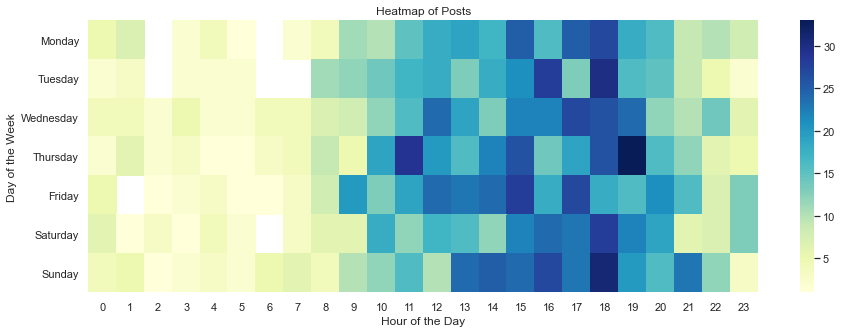

In [565]:
# day of week / hour trends
df_heatmap = timeseries.groupby(['post_hour','post_day_name']).video_url.count()
df_heatmap = df_heatmap.unstack(level=0)
df_heatmap

# heatmap by day of week and hour

f, ax = plt.subplots(figsize=(15, 5))
sns.set_color_codes("pastel")

reorderlist = [ 'Monday', 'Tuesday','Wednesday' ,'Thursday' ,'Friday', 'Saturday', 'Sunday']
sns.heatmap(df_heatmap.reindex(reorderlist), cmap="YlGnBu")

plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.title('Heatmap of Posts')

In [83]:
timeseries_type = timeseries.groupby(['post_date']).video_url.count().reset_index()
timeseries_type.head()

post_date  video_url
0 2018-11-07          1
1 2019-01-08          1
2 2019-01-20          1
3 2019-02-05          1
4 2019-02-24          1

In [556]:
timeseries_type = timeseries_type.query("post_date >= '2020-03-01'")

Text(0.5, 1.0, 'Daily Video Posts')

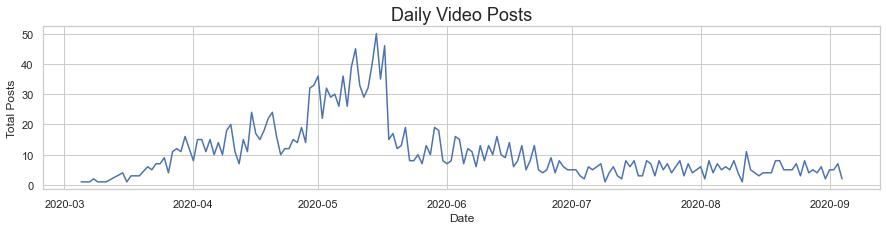

In [562]:
#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 3))
sns.set_color_codes("pastel")

ax = sns.lineplot(x="post_date", y="video_url", data=timeseries_type)

ax.set_xlabel('Date')
ax.set_ylabel('Total Posts')
ax.set_title('Daily Video Posts', fontsize=18)

In [88]:
timeseries_length = timeseries.groupby(['post_date']).video_length.mean().reset_index()
timeseries_length.head()

post_date  video_length
0 2018-11-07          15.0
1 2019-01-08          59.0
2 2019-01-20          15.0
3 2019-02-05          11.0
4 2019-02-24          59.0

In [563]:
timeseries_length = timeseries_length.query("post_date >= '2020-03-01'")

Text(0, 0.5, 'Avg. Video Length (second)')

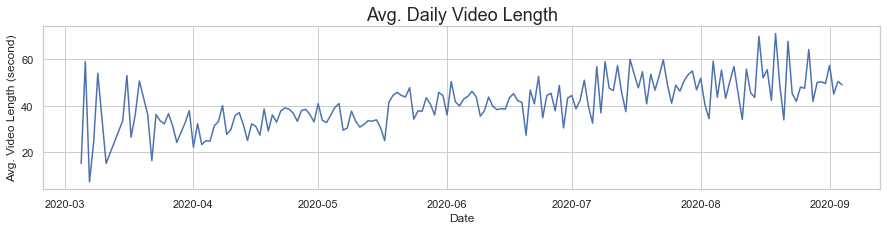

In [564]:
#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 3))
sns.set_color_codes("pastel")

ax = sns.lineplot(x="post_date", y="video_length", data=timeseries_length)

ax.set_title('Avg. Daily Video Length', fontsize=18)
ax.set_xlabel('Date')
ax.set_ylabel('Avg. Video Length (second)')

# Common Words

In [531]:
new_words = ['buat','nya','aja','sdm','gue','kalian','pake','kalau','banget','hingga','resep','pakai','video',
             'trus','bikin','youtube','pas','mau','link','sdt','nih','mereka','enak','menit','sih','biar','jadi',
             'tutorial','postingan','ya','ini','cek','udah','gak','cookingwithhel','cek','klik','bio','penasaran',
             'penjelasan','sekarang','soalnya','kali','yah','sesuai','kali','suka','klo','cuma','hungryfever','jangan',
             'bahan','klo','lebih','rata','cara','kalo','jdi','lbh','semua','aku','cobain','https','masak','rasa',
             'baru','coba','panas','masukan','langsung','selamat','anak','sedikit','devina','hermawan','youtube',
             'banyak','sama','paling','apa','kan','nah','check','out','with','yackikuka','hel', 'lengkapnya', 
             'selengkapnya', 'cari','store','xanderskitchen','full','available','dlm','dalam','keadaan','sehat','fypシ',
             'part','ada','bgt','fyp','makan','yuk','gampang','buka','masakdirumah','samasamabelajar','samasamadirumah',
             'guys','siapa','follow','tutorialmasak','tau','menu','lupa','sendiri','balas','ala','warga','tiktok',
             'dah','deh','ya','gini','komentarnetizen','giveaway','kasih','kaya','yaa','fypシツ','kangen','mencoba',
             'gagal','wkwk','lebihdarimenit','semoga','pernah','wajib','mirip','versi','gabut','veniithyacalista',
             'rasanya','anti','dong','foryou','mana','kek','sumpah','nama','buatnya','reply','gua','bgtt','doang',
             'sering','kyk','ampe','lgii','dri','iyaa','hmm','nihh','dicoba','mon','maap','ngertii','lagii','vidio',
             'iya','dlu','akuu','bilang','blg','emg','emang','dlu','itu','beli','kultum','namanya','folowers','guys',
             'followers', 'kulinernusantara','tiktokindonesia','lemaknyo','alamii','bagaimana','kawan','akang','teteh',
             'quotesff','hari','itu','dlu','keren','kayaknya','damai','share','aing','kedoyanan','guys','kesukaan',
             'seenak','fahmimiasmr','yukk','sultan','vivobooklaptopgue','bagipahala','story','kok','niat','potonya',
             'udh','sisanya','bkinnya','drpd','cukup','tiktokin','carinya','maklum','selalu','lalu','jadiin',
             'akhirnya','rumah','stock','berbagi','ayoo','cobainn','buatt','yak','bukan','pemdamnya','banget','acara',
             'kulkas','semangat','rcti','grub','rahasia','sukses','dapur','boong','ya','sebelah','kasihslow',
             'bersamatoday','semangatpuasa','seorang','kmrn','bayangkan','kos','murah','bang','ajarin','tebak','brp',
             'lma','bersih','ribet','hemat','mudah','inii','hehe','berbagiilmu','khalayak','ramai','detailnya',
             'rajawalicomunitytiktok','hinaan','dedikasikan','rajawalicomunitytiktokindonesia','foryoupage','mudah'
                ]
exclusions.extend(new_words)

In [532]:
data['clean'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (exclusions)]))
data['clean'] = data['clean'].str.lower()
data['clean'] = data['clean'].map(lambda x: clean_text(x))

In [533]:
data['clean'] = data['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (exclusions)]))

In [534]:
from collections import Counter

aggregate_counter = Counter()
for row_index,row in data.iterrows():
    c = Counter(row['clean'].split())
    aggregate_counter += c

common_words = [word[0] for word in aggregate_counter.most_common(50)]
common_words_counts = [word[1] for word in aggregate_counter.most_common(50)]

In [535]:
import matplotlib.pyplot as plt
import seaborn as sns

def barplot(words, words_counts, title):
    fig = plt.figure(figsize=(18,6))
    bar_plot = sns.barplot(x=words, y=words_counts)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(90)
#     plt.title(title)
    plt.show()

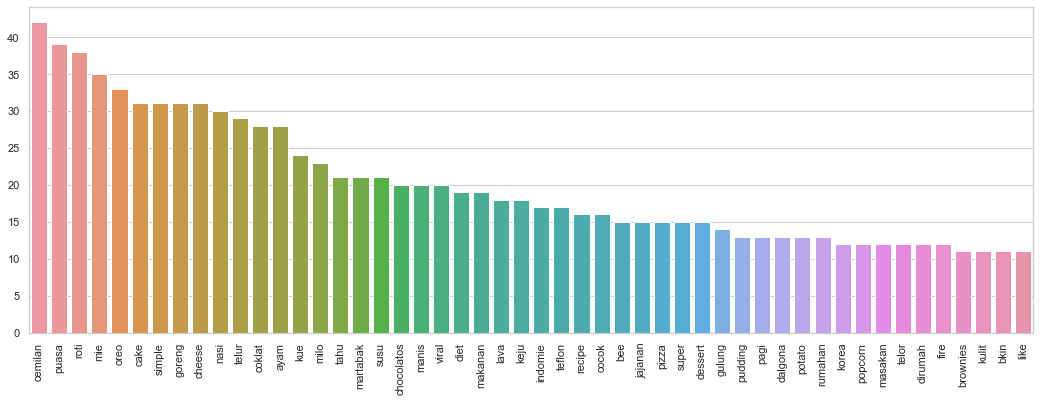

In [536]:
barplot(words=common_words, words_counts=common_words_counts, title="Most Frequent Phrase")

In [537]:
wordbank = data['clean']
wordbank

0                                                    🤣🥰🤟🏻
1                     cemilan fav siang inspirasi kalian🥰
2                                            telur gulung
3       kue ultah puding brownies chocolatos lembut ny...
4                                                  parah😭
                              ...                        
1995                                                     
1996                                   semur daging viral
1997                             piscok seadanya dirumah🤟
1998                                                     
1999                                  churros milo recipe
Name: clean, Length: 2000, dtype: object

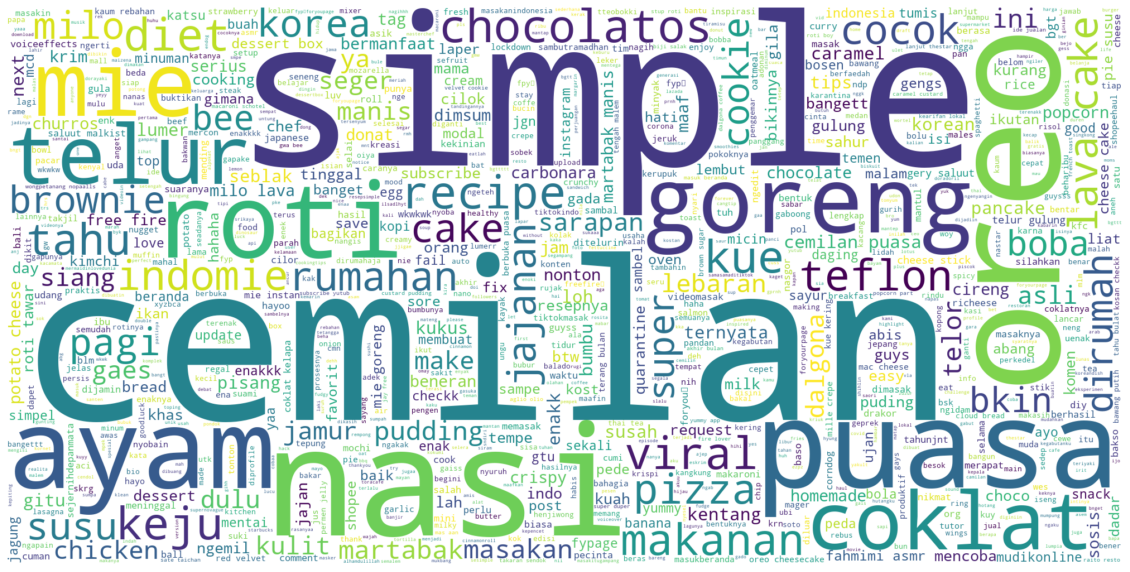

In [570]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# build a word cloud
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=1000, width=2000, height=1000).generate(' '.join(str(word) for word in wordbank))

# display the word cloud

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# N-gram Wordcloud

In [539]:
from sklearn.feature_extraction.text import CountVectorizer

In [540]:
vectorizer = CountVectorizer(ngram_range = (2,2)) 
X1 = vectorizer.fit_transform(data['clean'])  
features_bigram = (vectorizer.get_feature_names()) 
# print("\n\nFeatures : \n", features) 
# print("\n\nX1 : \n", X1.toarray())
sums = X1.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features_bigram): 
    data1.append( (term, sums[0,col] )) 

In [541]:
df_bigram = pd.DataFrame(data1, columns=['feature_names','frequency']).set_index('feature_names')
df_bigram.sort_values('frequency',ascending=False).head(5)

frequency
feature_names            
lava cake              16
cemilan puasa          11
milo lava               9
martabak manis          9
potato cheese           9

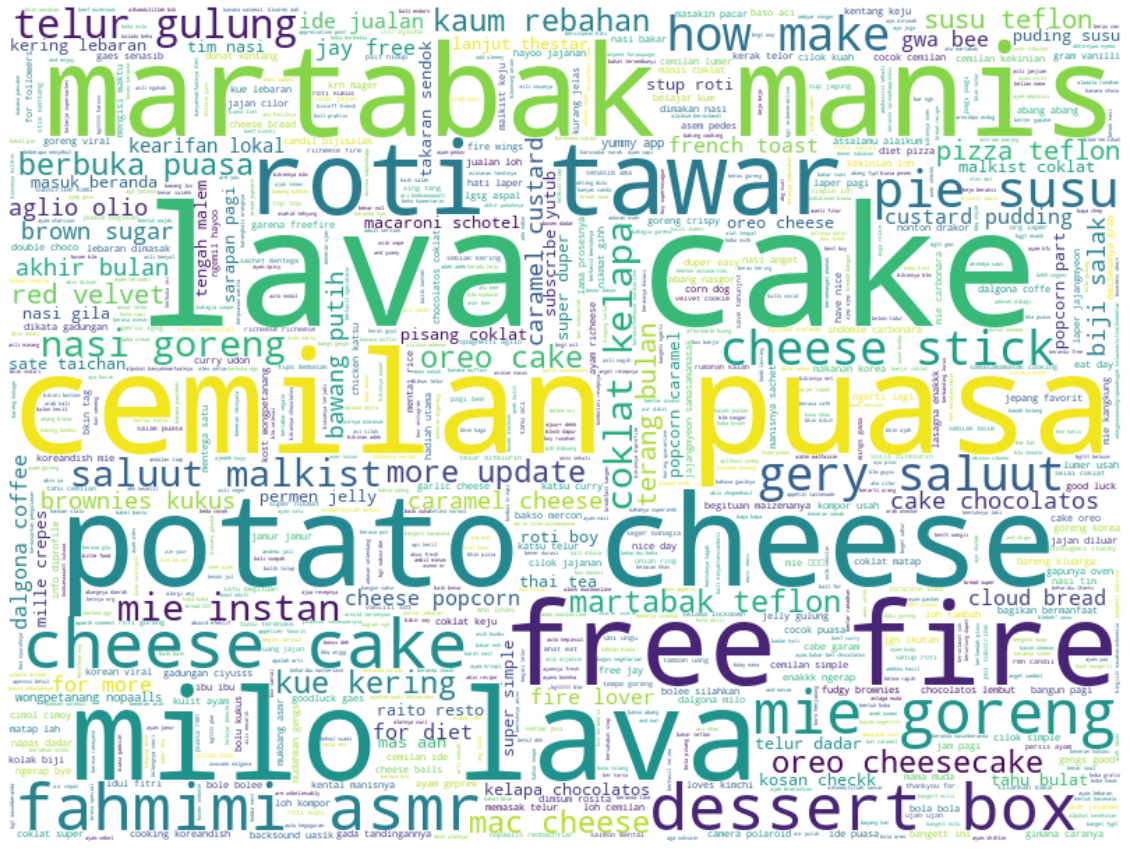

In [542]:
# build a word cloud
w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).generate_from_frequencies(df_bigram.frequency)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(20) # set height

plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show()

In [543]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(data['clean'])  
features = (vectorizer.get_feature_names()) 

sums = X1.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 

df_trigram = pd.DataFrame(data1, columns=['feature_names','frequency'])
df_trigram = df_trigram.set_index('feature_names')
df_trigram.sort_values('frequency',ascending=False).head(5)

frequency
feature_names                     
milo lava cake                   9
potato cheese stick              6
gery saluut malkist              5
pie susu teflon                  4
caramel custard pudding          3

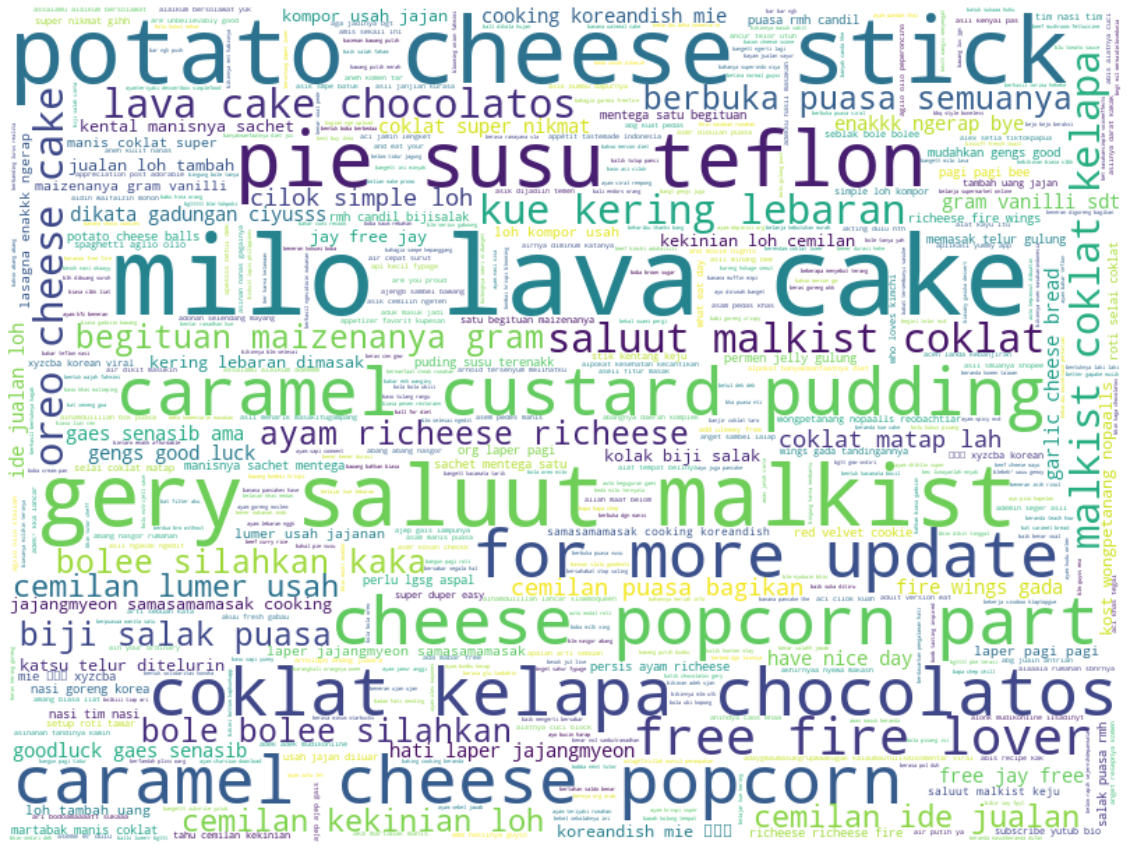

In [544]:
# build a word cloud
w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).generate_from_frequencies(df_trigram.frequency)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show()

# Extract Dish Name from N-Grams

In [545]:
import emoji

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)

In [546]:
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.util import trigrams

extract_dish = pd.DataFrame()
extract_dish = data[['video_url','video_desc','clean','cnt_likes','cnt_plays','cnt_shares','cnt_comments']]
extract_dish['clean'] = [remove_emoji(clean) for clean in extract_dish['clean']]
extract_dish['bigram_raw'] = extract_dish['clean'].apply(lambda row: list(bigrams(row.split(' '))))
extract_dish['trigram_raw'] = extract_dish['clean'].apply(lambda row: list(trigrams(row.split(' '))))
extract_dish.head()

/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

video_url  \
0  ['https://v16m.tiktokcdn.com/3730c9d0e2be03207...   
1  ['https://v16m.tiktokcdn.com/d09ee9bb67ef7d68f...   
2  ['https://v16m.tiktokcdn.com/791a40f53a5d17f83...   
3  ['https://v16m.tiktokcdn.com/f3fe7a6dd076e013c...   
4  ['https://v16m.tiktokcdn.com/79c795c0c6205d97e...   

                                          video_desc  \
0  Ada yang pernah makan? atau sering kyk aku? 🤣🥰...   
1  cemilan fav akuu, aku bkinnya kmrn siang, buat...   
2  tutorial telur gulung anti gagal check #samasa...   
3  Bisa buat kue ultah, Puding brownies pakai @ch...   
4   ENAK PARAH😭 #indomie #masakdirumah #fypindonesia   

                                               clean  cnt_likes  cnt_plays  \
0                                                       1700000   13300000   
1                 cemilan fav siang inspirasi kalian    1400000   19600000   
2                                       telur gulung    1300000   20500000   
3  kue ultah puding brownies chocolatos lembut ny...    1100000   16100000   
4                                              parah     815800    7600000   

   cnt_shares  cnt_comments  \
0       22400         10800   
1       34500          4156   
2       22400          4076   
3       72400          3195   
4        9083          3087   

                                          bigram_raw  \
0                                                 []   
1  [(cemilan, fav), (fav, siang), (siang, inspira...   
2                                  [(telur, gulung)]   
3  [(kue, ultah), (ultah, puding), (puding, brown...   
4                                                 []   

                                         trigram_raw  
0                                                 []  
1  [(cemilan, fav, siang), (fav, siang, inspirasi...  
2                                                 []  
3  [(kue, ultah, puding), (ultah, puding, brownie...  
4                                                 []

In [547]:
bigram_list = extract_dish['bigram_raw'].tolist()
all_bigram_list = []

for x in bigram_list:
    row_mention_list = []
    for y in x:
        new_y = str(y).replace('(','').replace(')','').replace("'","").replace(", "," ")
        if new_y == np.nan:
            new_y = ''
        row_mention_list.append(new_y)
    all_bigram_list.append(row_mention_list)

extract_dish['bigram_list'] = all_bigram_list
extract_dish.head()

/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


video_url  \
0  ['https://v16m.tiktokcdn.com/3730c9d0e2be03207...   
1  ['https://v16m.tiktokcdn.com/d09ee9bb67ef7d68f...   
2  ['https://v16m.tiktokcdn.com/791a40f53a5d17f83...   
3  ['https://v16m.tiktokcdn.com/f3fe7a6dd076e013c...   
4  ['https://v16m.tiktokcdn.com/79c795c0c6205d97e...   

                                          video_desc  \
0  Ada yang pernah makan? atau sering kyk aku? 🤣🥰...   
1  cemilan fav akuu, aku bkinnya kmrn siang, buat...   
2  tutorial telur gulung anti gagal check #samasa...   
3  Bisa buat kue ultah, Puding brownies pakai @ch...   
4   ENAK PARAH😭 #indomie #masakdirumah #fypindonesia   

                                               clean  cnt_likes  cnt_plays  \
0                                                       1700000   13300000   
1                 cemilan fav siang inspirasi kalian    1400000   19600000   
2                                       telur gulung    1300000   20500000   
3  kue ultah puding brownies chocolatos lembut ny...    1100000   16100000   
4                                              parah     815800    7600000   

   cnt_shares  cnt_comments  \
0       22400         10800   
1       34500          4156   
2       22400          4076   
3       72400          3195   
4        9083          3087   

                                          bigram_raw  \
0                                                 []   
1  [(cemilan, fav), (fav, siang), (siang, inspira...   
2                                  [(telur, gulung)]   
3  [(kue, ultah), (ultah, puding), (puding, brown...   
4                                                 []   

                                         trigram_raw  \
0                                                 []   
1  [(cemilan, fav, siang), (fav, siang, inspirasi...   
2                                                 []   
3  [(kue, ultah, puding), (ultah, puding, brownie...   
4                                                 []   

                                         bigram_list  
0                                                 []  
1  [cemilan fav, fav siang, siang inspirasi, insp...  
2                                     [telur gulung]  
3  [kue ultah, ultah puding, puding brownies, bro...  
4                                                 []

In [548]:
bigram_list = extract_dish['bigram_list'].tolist()
highest_bigram = []
highest_bigram_freq = []

for x in bigram_list:
    row_mention_list = []
    highest_y = 0
    highest_phrase = ''
    for y in x:
        y1 = y
        y1 = y1.rstrip()
        y1 = y1.lstrip()
        try:
            new_y = df_trigram.loc[str(y1),['frequency']].frequency
        except KeyError:
            new_y = 0
        if new_y > highest_y:
            highest_y = new_y
            highest_phrase = y
    highest_bigram.append(highest_phrase)
    highest_bigram_freq.append(highest_y)

extract_dish['dish_bigram'] = highest_bigram
extract_dish['dish_bigram_frq'] = highest_bigram_freq
extract_dish.head()

/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


video_url  \
0  ['https://v16m.tiktokcdn.com/3730c9d0e2be03207...   
1  ['https://v16m.tiktokcdn.com/d09ee9bb67ef7d68f...   
2  ['https://v16m.tiktokcdn.com/791a40f53a5d17f83...   
3  ['https://v16m.tiktokcdn.com/f3fe7a6dd076e013c...   
4  ['https://v16m.tiktokcdn.com/79c795c0c6205d97e...   

                                          video_desc  \
0  Ada yang pernah makan? atau sering kyk aku? 🤣🥰...   
1  cemilan fav akuu, aku bkinnya kmrn siang, buat...   
2  tutorial telur gulung anti gagal check #samasa...   
3  Bisa buat kue ultah, Puding brownies pakai @ch...   
4   ENAK PARAH😭 #indomie #masakdirumah #fypindonesia   

                                               clean  cnt_likes  cnt_plays  \
0                                                       1700000   13300000   
1                 cemilan fav siang inspirasi kalian    1400000   19600000   
2                                       telur gulung    1300000   20500000   
3  kue ultah puding brownies chocolatos lembut ny...    1100000   16100000   
4                                              parah     815800    7600000   

   cnt_shares  cnt_comments  \
0       22400         10800   
1       34500          4156   
2       22400          4076   
3       72400          3195   
4        9083          3087   

                                          bigram_raw  \
0                                                 []   
1  [(cemilan, fav), (fav, siang), (siang, inspira...   
2                                  [(telur, gulung)]   
3  [(kue, ultah), (ultah, puding), (puding, brown...   
4                                                 []   

                                         trigram_raw  \
0                                                 []   
1  [(cemilan, fav, siang), (fav, siang, inspirasi...   
2                                                 []   
3  [(kue, ultah, puding), (ultah, puding, brownie...   
4                                                 []   

                                         bigram_list dish_bigram  \
0                                                 []               
1  [cemilan fav, fav siang, siang inspirasi, insp...               
2                                     [telur gulung]               
3  [kue ultah, ultah puding, puding brownies, bro...               
4                                                 []               

   dish_bigram_frq  
0                0  
1                0  
2                0  
3                0  
4                0

In [549]:
trigram_list = extract_dish['trigram_raw'].tolist()
all_trigram_list = []

for x in trigram_list:
    row_mention_list = []
    for y in x:
        new_y = str(y).replace('(','').replace(')','').replace("'","").replace(", "," ")
        if new_y == np.nan:
            new_y = ''
        row_mention_list.append(new_y)
    all_trigram_list.append(row_mention_list)

extract_dish['trigram_list'] = all_trigram_list
extract_dish.head()

/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


video_url  \
0  ['https://v16m.tiktokcdn.com/3730c9d0e2be03207...   
1  ['https://v16m.tiktokcdn.com/d09ee9bb67ef7d68f...   
2  ['https://v16m.tiktokcdn.com/791a40f53a5d17f83...   
3  ['https://v16m.tiktokcdn.com/f3fe7a6dd076e013c...   
4  ['https://v16m.tiktokcdn.com/79c795c0c6205d97e...   

                                          video_desc  \
0  Ada yang pernah makan? atau sering kyk aku? 🤣🥰...   
1  cemilan fav akuu, aku bkinnya kmrn siang, buat...   
2  tutorial telur gulung anti gagal check #samasa...   
3  Bisa buat kue ultah, Puding brownies pakai @ch...   
4   ENAK PARAH😭 #indomie #masakdirumah #fypindonesia   

                                               clean  cnt_likes  cnt_plays  \
0                                                       1700000   13300000   
1                 cemilan fav siang inspirasi kalian    1400000   19600000   
2                                       telur gulung    1300000   20500000   
3  kue ultah puding brownies chocolatos lembut ny...    1100000   16100000   
4                                              parah     815800    7600000   

   cnt_shares  cnt_comments  \
0       22400         10800   
1       34500          4156   
2       22400          4076   
3       72400          3195   
4        9083          3087   

                                          bigram_raw  \
0                                                 []   
1  [(cemilan, fav), (fav, siang), (siang, inspira...   
2                                  [(telur, gulung)]   
3  [(kue, ultah), (ultah, puding), (puding, brown...   
4                                                 []   

                                         trigram_raw  \
0                                                 []   
1  [(cemilan, fav, siang), (fav, siang, inspirasi...   
2                                                 []   
3  [(kue, ultah, puding), (ultah, puding, brownie...   
4                                                 []   

                                         bigram_list dish_bigram  \
0                                                 []               
1  [cemilan fav, fav siang, siang inspirasi, insp...               
2                                     [telur gulung]               
3  [kue ultah, ultah puding, puding brownies, bro...               
4                                                 []               

   dish_bigram_frq                                       trigram_list  
0                0                                                 []  
1                0  [cemilan fav siang, fav siang inspirasi, siang...  
2                0                                                 []  
3                0  [kue ultah puding, ultah puding brownies, pudi...  
4                0                                                 []

In [550]:
trigram_list = extract_dish['trigram_list'].tolist()
highest_trigram = []
highest_trigram_freq = []

for x in trigram_list:
    row_mention_list = []
    highest_y = 0
    highest_phrase = ''
    for y in x:
        y1 = y
        y1 = y1.rstrip()
        y1 = y1.lstrip()
        try:
            new_y = df_trigram.loc[str(y1),['frequency']].frequency
        except KeyError:
            new_y = 0
        if new_y > highest_y:
            highest_y = new_y
            highest_phrase = y
    highest_trigram.append(highest_phrase)
    highest_trigram_freq.append(highest_y)

extract_dish['dish_trigram'] = highest_trigram
extract_dish['dish_trigram_frq'] = highest_trigram_freq
extract_dish

/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


video_url  \
0     ['https://v16m.tiktokcdn.com/3730c9d0e2be03207...   
1     ['https://v16m.tiktokcdn.com/d09ee9bb67ef7d68f...   
2     ['https://v16m.tiktokcdn.com/791a40f53a5d17f83...   
3     ['https://v16m.tiktokcdn.com/f3fe7a6dd076e013c...   
4     ['https://v16m.tiktokcdn.com/79c795c0c6205d97e...   
...                                                 ...   
1995  ['https://v16m.tiktokcdn.com/085c5294d84fb8c13...   
1996  ['https://v16m.tiktokcdn.com/450260a78263b1a66...   
1997  ['https://v16m.tiktokcdn.com/4798ad11b679eb975...   
1998  ['https://v16m.tiktokcdn.com/ba5093ee4175b06ca...   
1999  ['https://v16m.tiktokcdn.com/4bf836fedddb1dfc1...   

                                             video_desc  \
0     Ada yang pernah makan? atau sering kyk aku? 🤣🥰...   
1     cemilan fav akuu, aku bkinnya kmrn siang, buat...   
2     tutorial telur gulung anti gagal check #samasa...   
3     Bisa buat kue ultah, Puding brownies pakai @ch...   
4      ENAK PARAH😭 #indomie #masakdirumah #fypindonesia   
...                                                 ...   
1995  #videomasak #tutorialmasak #dirumahaja #curros...   
1996  Semur Daging #semurdaging #tiktokprom #minitut...   
1997  PISCOK dengan bahan seadanya dirumah🤟  #tiktok...   
1998  #samasamadirumah #dirumahaja #videomasak #cook...   
1999  CHURROS MILO RECIPE #fyp #foryourpage #samasam...   

                                                  clean  cnt_likes  cnt_plays  \
0                                                          1700000   13300000   
1                    cemilan fav siang inspirasi kalian    1400000   19600000   
2                                          telur gulung    1300000   20500000   
3     kue ultah puding brownies chocolatos lembut ny...    1100000   16100000   
4                                                 parah     815800    7600000   
...                                                 ...        ...        ...   
1995                                                            70       4932   
1996                                 semur daging viral         69        427   
1997                            piscok seadanya dirumah         69        526   
1998                                                            69       2593   
1999                                churros milo recipe         69       1413   

      cnt_shares  cnt_comments  \
0          22400         10800   
1          34500          4156   
2          22400          4076   
3          72400          3195   
4           9083          3087   
...          ...           ...   
1995           1             0   
1996           0             0   
1997           0             0   
1998           0             1   
1999           5             0   

                                             bigram_raw  \
0                                                    []   
1     [(cemilan, fav), (fav, siang), (siang, inspira...   
2                                     [(telur, gulung)]   
3     [(kue, ultah), (ultah, puding), (puding, brown...   
4                                                    []   
...                                                 ...   
1995                                                 []   
1996                 [(semur, daging), (daging, viral)]   
1997          [(piscok, seadanya), (seadanya, dirumah)]   
1998                                                 []   
1999                  [(churros, milo), (milo, recipe)]   

                                            trigram_raw  \
0                                                    []   
1     [(cemilan, fav, siang), (fav, siang, inspirasi...   
2                                                    []   
3     [(kue, ultah, puding), (ultah, puding, brownie...   
4                                                    []   
...                                                 ...   
1995                                                 []   
1996                           [(semur, daging, viral)]   
1997  

In [551]:
def f_dish_name(row):
    if row['dish_trigram'].count(' ') > 1 :
        val = row['dish_trigram']
    else:
        val = row['dish_bigram']
    return val


extract_dish['final_dish_name'] = extract_dish.apply(f_dish_name, axis=1)
extract_dish = extract_dish.query("final_dish_name != ''")
extract_dish

/anaconda3/envs/external_exp/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


video_url  \
1     ['https://v16m.tiktokcdn.com/d09ee9bb67ef7d68f...   
3     ['https://v16m.tiktokcdn.com/f3fe7a6dd076e013c...   
5     ['https://v16m.tiktokcdn.com/5b1c74713b2497361...   
8     ['https://v16m.tiktokcdn.com/54a9cc630bdbb863e...   
15    ['https://v16m.tiktokcdn.com/ae16dfb1381c101e4...   
...                                                 ...   
1993  ['https://v16m.tiktokcdn.com/ab6eac959ad848e68...   
1994  ['https://v16m.tiktokcdn.com/6775b6abacaa8fb24...   
1996  ['https://v16m.tiktokcdn.com/450260a78263b1a66...   
1997  ['https://v16m.tiktokcdn.com/4798ad11b679eb975...   
1999  ['https://v16m.tiktokcdn.com/4bf836fedddb1dfc1...   

                                             video_desc  \
1     cemilan fav akuu, aku bkinnya kmrn siang, buat...   
3     Bisa buat kue ultah, Puding brownies pakai @ch...   
5     resep telur dadar katsu telur yang ditelurin c...   
8     Balas @bsw_1281 Bikin Es Krim dari biskuit cek...   
15    Enak nihh di makan sambil ngeteh sore sore bar...   
...                                                 ...   
1993  eecciiee tmben ya bebikinan biasa.a cm CLBK (C...   
1994  Milo lava cake part.2 #tiktokmasak #tutorialma...   
1996  Semur Daging #semurdaging #tiktokprom #minitut...   
1997  PISCOK dengan bahan seadanya dirumah🤟  #tiktok...   
1999  CHURROS MILO RECIPE #fyp #foryourpage #samasam...   

                                                  clean  cnt_likes  cnt_plays  \
1                    cemilan fav siang inspirasi kalian    1400000   19600000   
3     kue ultah puding brownies chocolatos lembut ny...    1100000   16100000   
5                     telur dadar katsu telur ditelurin     681700    7500000   
8                                      bsw krim biskuit     593900    6400000   
15                      ngeteh sore sore bareng kluarga     549900    6300000   
...                                                 ...        ...        ...   
1993  eecciiee tmben bebikinan biasa clbk liat bkin ...         70        706   
1994                                     milo lava cake         70        575   
1996                                 semur daging viral         69        427   
1997                            piscok seadanya dirumah         69        526   
1999                                churros milo recipe         69       1413   

      cnt_shares  cnt_comments  \
1          34500          4156   
3          72400          3195   
5          12800          2853   
8          10100          1533   
15          8054          1400   
...          ...           ...   
1993           0             0   
1994           0             0   
1996           0             0   
1997           0             0   
1999           5             0   

                                             bigram_raw  \
1     [(cemilan, fav), (fav, siang), (siang, inspira...   
3     [(kue, ultah), (ultah, puding), (puding, brown...   
5     [(telur, dadar), (dadar, katsu), (katsu, telur...   
8                        [(bsw, krim), (krim, biskuit)]   
15    [(ngeteh, sore), (sore, sore), (sore, bareng),...   
...                                                 ...   
1993  [(eecciiee, tmben), (tmben, bebikinan), (bebik...   
1994                       [(milo, lava), (lava, cake)]   
1996                 [(semur, daging), (daging, viral)]   
1997          [(piscok, seadanya), (seadanya, dirumah)]   
1999                  [(churros, milo), (milo, recipe)]   

                                            trigram_raw  \
1     [(cemilan, fav, siang), (fav, siang, inspirasi...   
3     [(kue, ultah, puding), (ultah, puding, brownie...   
5     [(telur, dadar, katsu), (dadar, katsu, telur),...   
8                                [(bsw, krim, biskuit)]   
15    [(ngeteh, sore, sore), (sore, sore, bareng), (...   
...                                                 ...   
1993  [(eecciiee, tmben, bebikinan), (tmben, bebikin...   
1994                               [(milo, lava, cake)]   
1996  

Text(0.5, 1.0, 'Videos with Highest Likes')

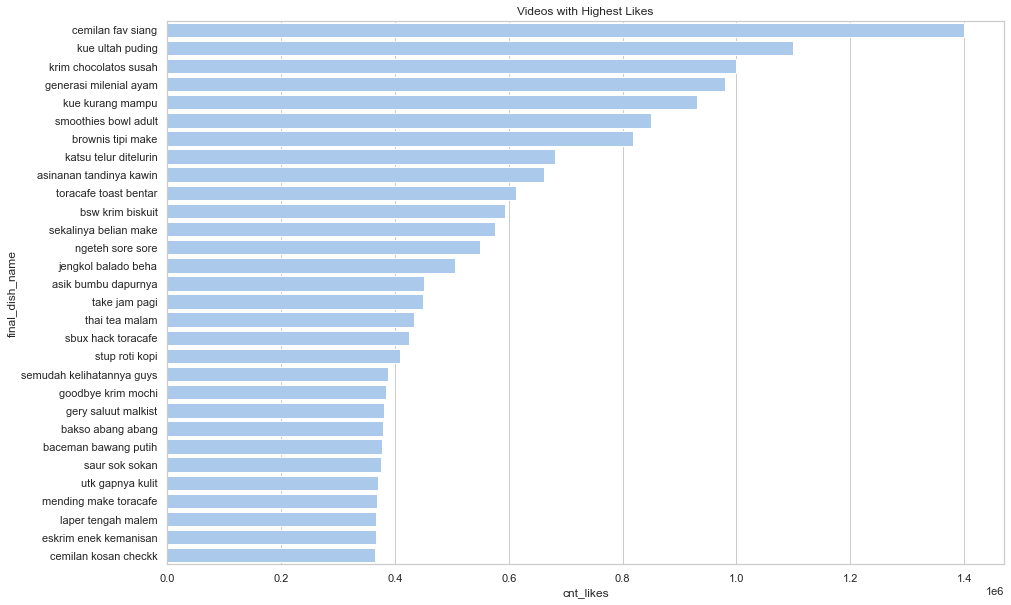

In [552]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Load the example car crash dataset
data_likes = extract_dish.sort_values("cnt_likes", ascending=False).head(30)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="cnt_likes", y="final_dish_name", data=data_likes,
            label="Total Likes", color="b")

ax.set_title('Videos with Highest Likes')

Text(0.5, 1.0, 'Videos with Highest Shares')

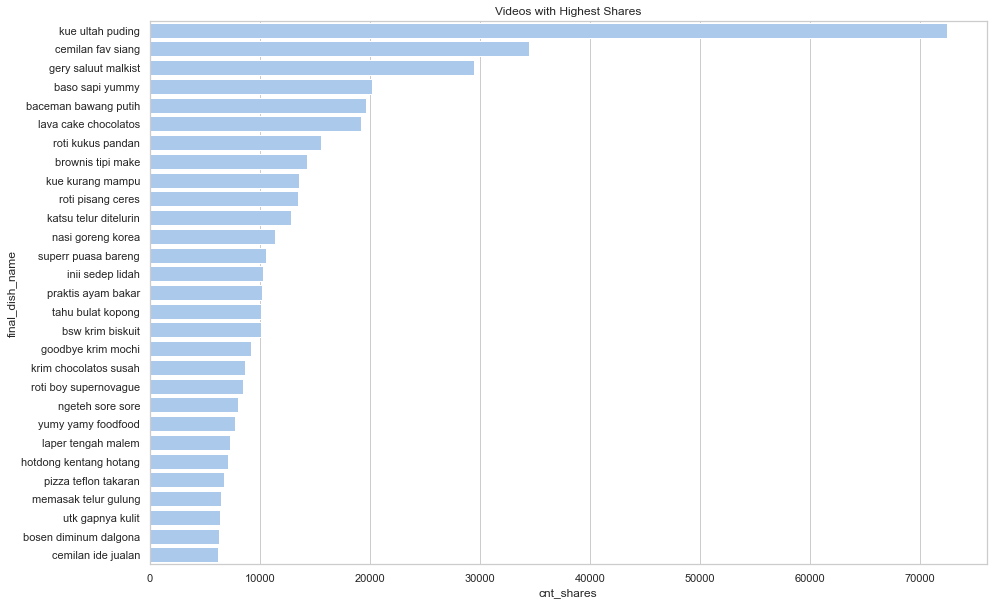

In [553]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Load the example car crash dataset
data_likes = extract_dish.sort_values("cnt_shares", ascending=False).head(30)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="cnt_shares", y="final_dish_name", data=data_likes,
            label="Total Shares", color="b")

ax.set_title('Videos with Highest Shares')

Text(0.5, 1.0, 'Videos with Highest Plays')

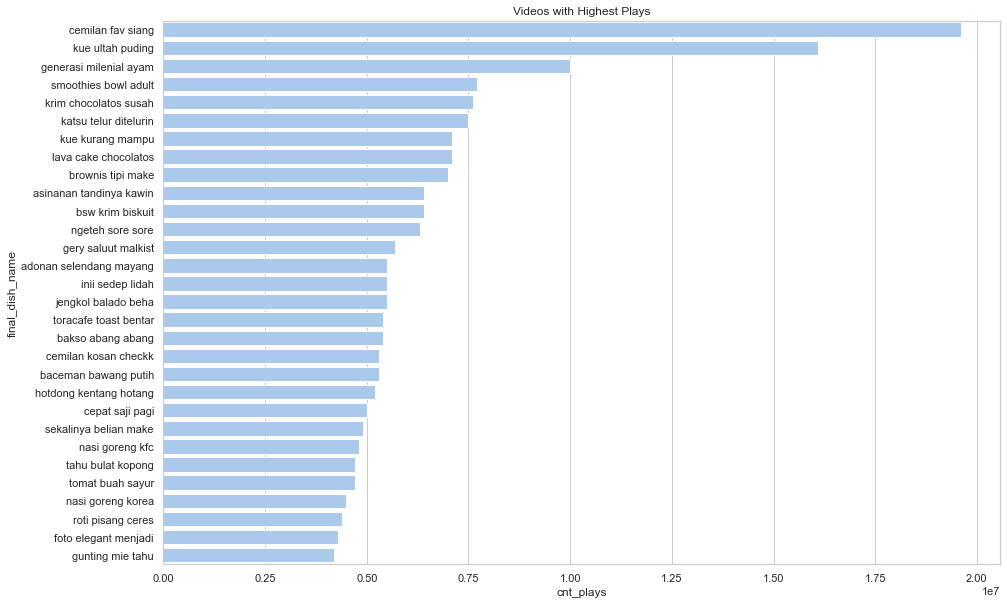

In [554]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Load the example car crash dataset
data_likes = extract_dish.sort_values("cnt_plays", ascending=False).head(30)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="cnt_plays", y="final_dish_name", data=data_likes,
            label="Total Plays", color="b")

ax.set_title('Videos with Highest Plays')

Text(0.5, 1.0, 'Videos with Highest Comments')

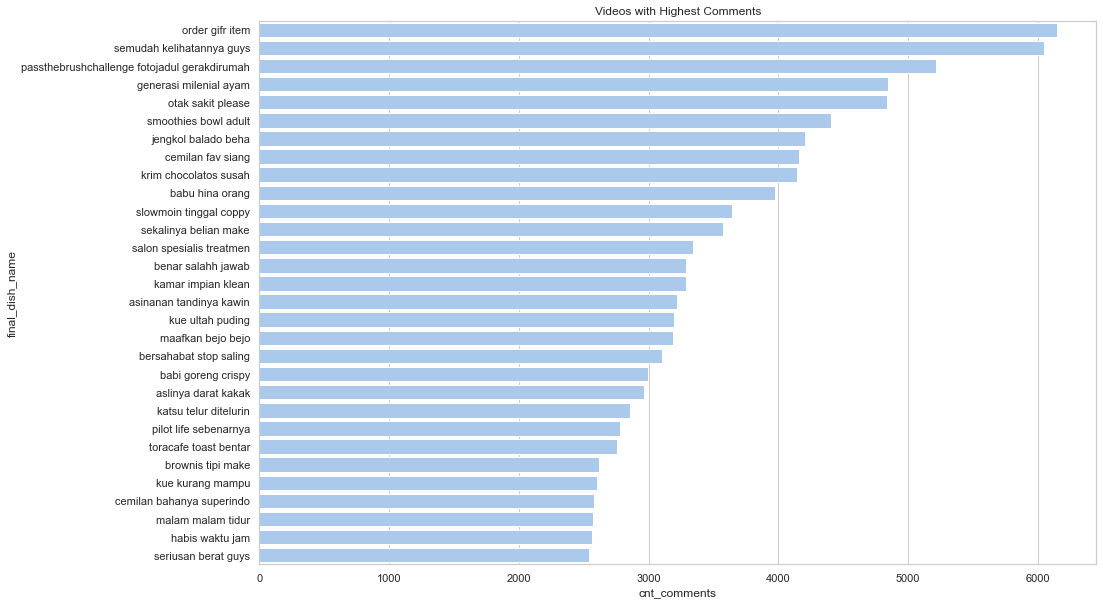

In [555]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Load the example car crash dataset
data_likes = extract_dish.sort_values("cnt_comments", ascending=False).head(30)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="cnt_comments", y="final_dish_name", data=data_likes,
            label="Total Comments", color="b")

ax.set_title('Videos with Highest Comments')

# Improve Viz

In [445]:
import PIL.Image
from pylab import *

Image opened and saved!


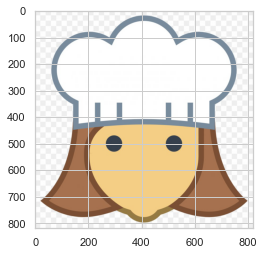

In [446]:
# open image (just make sure it's in your working directory) and save mask to book

mic = np.array(PIL.Image.open('cook2.jpg'))

imshow(mic)

print('Image opened and saved!')

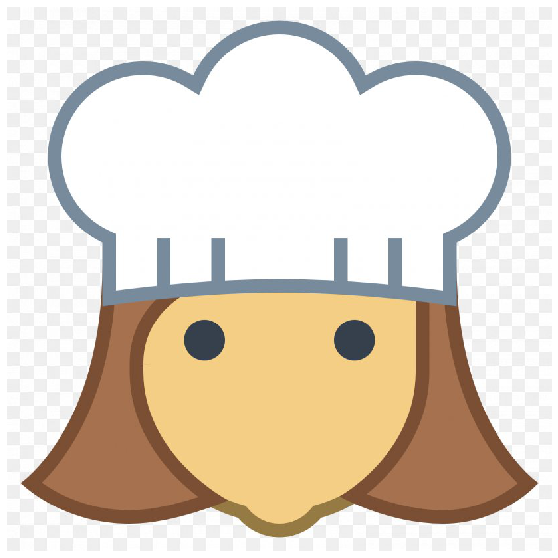

In [447]:
# display mask image

fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

plt.imshow(mic, cmap=plt.cm.gray, interpolation='None')
plt.axis('off')
plt.show()

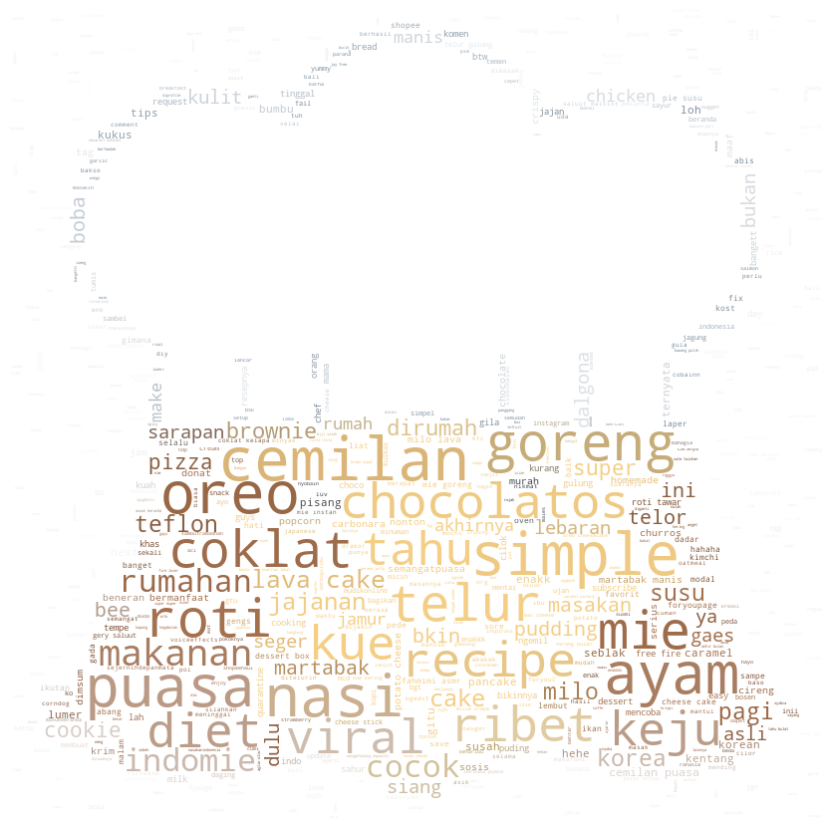

In [448]:
# create a beautiful wordcloud

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=3000, mask=mic,
               stopwords=stopwords, max_font_size=60, random_state=42)
# generate word cloud
wc.generate(' '.join(wordbank))

# create coloring from image
image_colors = ImageColorGenerator(mic)

# show
plt.figure(figsize=(15, 15))

# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

plt.axis('off')

plt.show()

Image opened and saved!


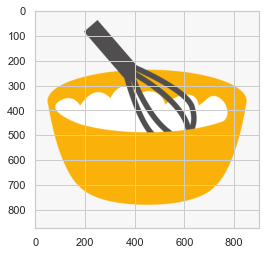

In [201]:
# open image (just make sure it's in your working directory) and save mask to book

mic2 = np.array(PIL.Image.open('mix.png'))

imshow(mic2)

print('Image opened and saved!')

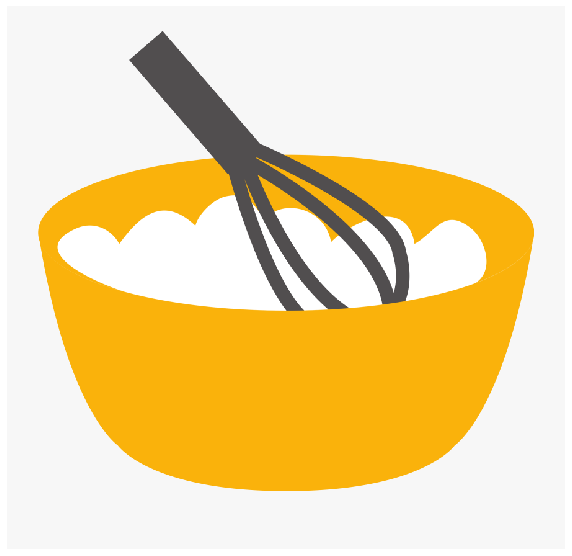

In [202]:
# display mask image

fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

plt.imshow(mic2, cmap=plt.cm.gray, interpolation='None')
plt.axis('off')
plt.show()

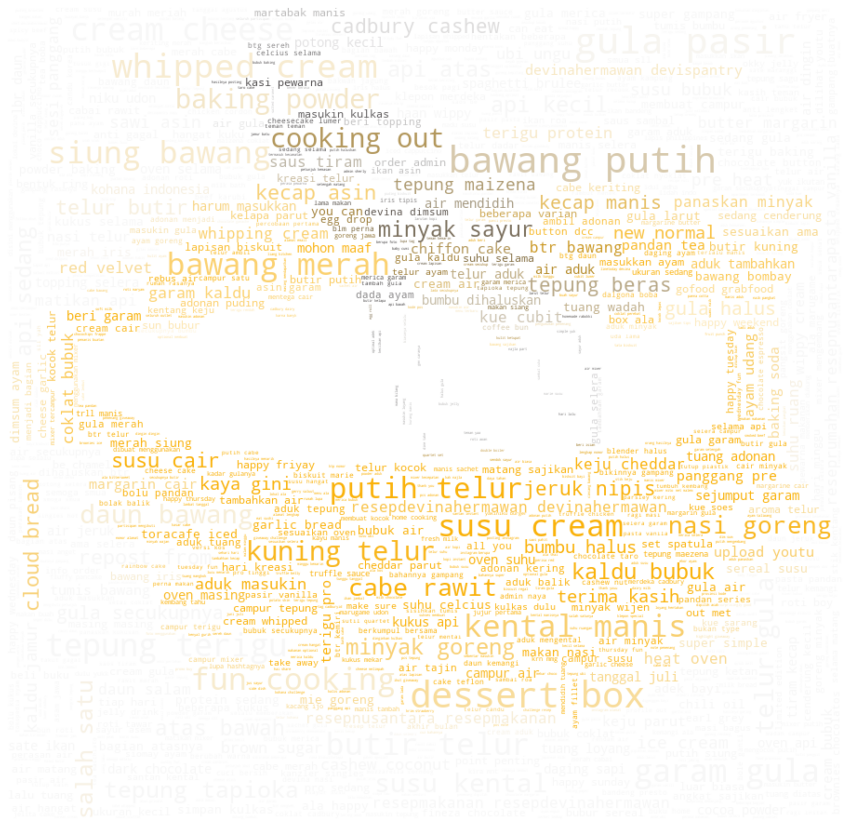

In [203]:
# create a beautiful wordcloud

stopwords = set(STOPWORDS)

w = WordCloud(width=800,height=600,background_color='white',max_words=2000).generate_from_frequencies(df_bigram.frequency)

# create coloring from image
image_colors = ImageColorGenerator(mic2)

# show
plt.figure(figsize=(15, 15))

# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

plt.axis('off')

plt.show()